In [4]:
import os
os.chdir("..")
print(os.getcwd())

from matchms.importing import load_from_mgf

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\MS2LDA


In [27]:
from rdkit.Chem.inchi import MolFromInchi
from rdkit import DataStructs
from rdkit.Chem import AllChem
fpgen = AllChem.GetRDKitFPGenerator()

In [20]:
spectra_path = r"test_data\pos_ache_inhibitors_pesticides.mgf"
spectra = load_from_mgf(spectra_path)

In [21]:
inchis = []
for spectrum in spectra:
    inchi = spectrum.get("inchi")
    inchis.append(inchi)

In [23]:
mols = [Chem.MolFromInchi(inchi) for inchi in inchis]

---

### Mol similarity based on fingerprints

In [28]:
fps = [fpgen.GetFingerprint(mol) for mol in mols]

In [36]:
len(fps)

705

In [29]:
from itertools import combinations

In [30]:
fps_combinations = combinations(fps, 2)

In [31]:
tanimoto_scores = []
for fp1, fp2 in fps_combinations:
    tanimoto_score = DataStructs.TanimotoSimilarity(fp1,fp2)
    tanimoto_scores.append(tanimoto_score)

In [33]:
import matplotlib.pyplot as plt

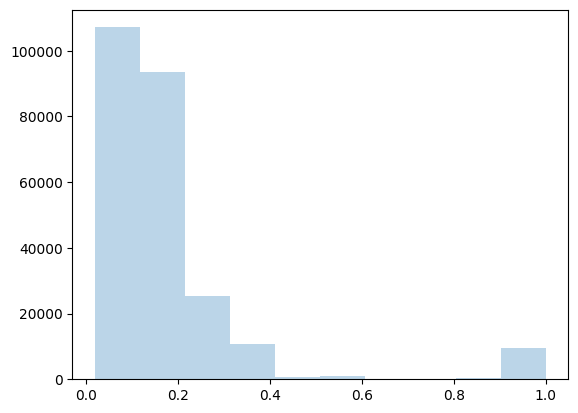

In [66]:
plt.hist(tanimoto_scores, alpha=0.3)
plt.show()

### Most common Murcko framework

In [48]:
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
from collections import Counter
from rdkit.Chem import Draw
from rdkit import Chem

In [54]:
c = Counter()
for mol in mols:
    scaffold_mol = GetScaffoldForMol(mol)
    scaffold_smiles = Chem.MolToSmiles(scaffold_mol)
    c[scaffold_smiles] += 1

In [62]:
c.most_common(20)

[('', 213),
 ('c1ccccc1', 177),
 ('c1cncnc1', 111),
 ('c1ccncc1', 47),
 ('c1ccc2c(c1)CCO2', 44),
 ('c1cnc2ccnn2c1', 31),
 ('c1ccc2ccccc2c1', 29),
 ('O=c1[nH]nnc2ccccc12', 19),
 ('O=C1NCCS1', 11),
 ('O=c1[nH]ncs1', 6),
 ('c1ccc(-n2cncn2)cc1', 6),
 ('O=c1[nH]c2ccccc2o1', 6),
 ('O=C1NC(=O)c2ccccc21', 5)]

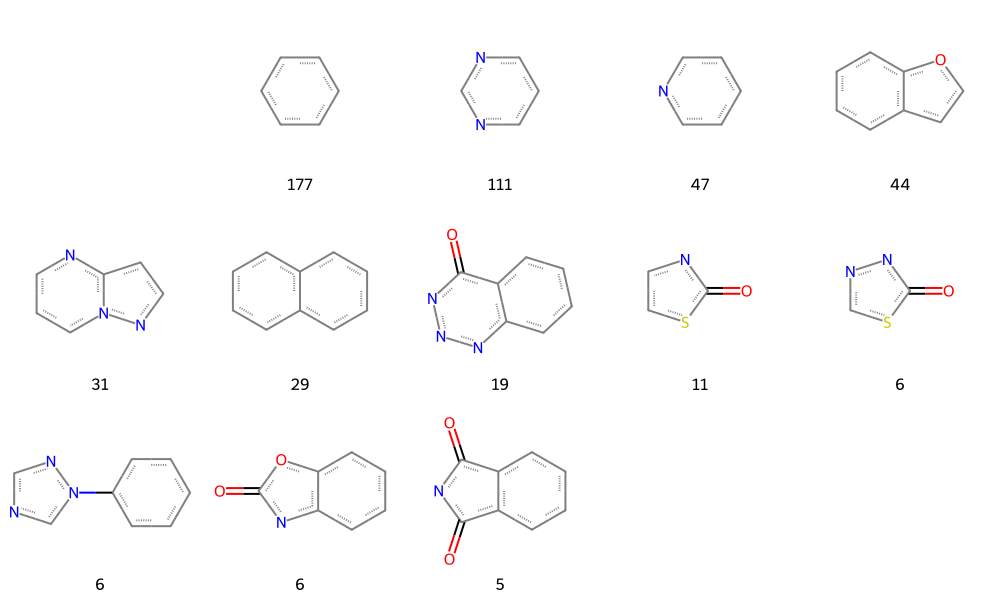

In [65]:
Draw.MolsToGridImage([Chem.MolFromSmarts(smarts) for smarts, count in list(c.most_common())], molsPerRow=5, legends=[str(count) for smarts, count in list(c.most_common())])

REMEMBER: the scaffold number 6 (found 29 times) is not included in the first one (found 177 times)

There are 705 molecules in the dataset